In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd  

# 1 KNN

In [11]:
import numpy as np  
from sklearn import neighbors 
 
knn = neighbors.KNeighborsClassifier() #取得knn分类器  
data = np.array([[3,104], [2,100], [1,81], [101,10], [99,5], [98,2]]) #data对应着打斗次数和接吻次数
labels = np.array([1, 1, 1, 2, 2, 2]) #labels则是对应Romance和Action
knn.fit(data, labels) #导入数据进行训练 
print(knn.predict([18, 90]))

[1]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [12]:
"""
scikit-learn 库对knn的支持
数据集是iris虹膜数据集
"""

from sklearn.datasets import load_iris  
from sklearn import neighbors  
import sklearn  
  
#查看iris数据集  
iris = load_iris()  
print(iris)

'''
KNeighborsClassifier(n_neighbors=5, weights='uniform', 
                     algorithm='auto', leaf_size=30, 
                     p=2, metric='minkowski', 
                     metric_params=None, n_jobs=1, **kwargs)
n_neighbors: 默认值为5，表示查询k个最近邻的数目
algorithm:   {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’},指定用于计算最近邻的算法，auto表示试图采用最适合的算法计算最近邻
leaf_size:   传递给‘ball_tree’或‘kd_tree’的叶子大小
metric:      用于树的距离度量。默认'minkowski与P = 2（即欧氏度量）
n_jobs:      并行工作的数量，如果设为-1，则作业的数量被设置为CPU内核的数量
查看官方api：http://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
'''
knn = neighbors.KNeighborsClassifier()  
#训练数据集  
knn.fit(iris.data, iris.target)
#训练准确率
score = knn.score(iris.data, iris.target)

#预测
predict = knn.predict([[0.1,0.2,0.3,0.4]])
#预测，返回概率数组
predict2 = knn.predict_proba([[0.1,0.2,0.3,0.4]])

print('Predict: ' + str(predict))
print(iris.target_names[predict])

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# 2 Decision Tree
作为分类器，__决策树__是一棵有向无环树。由根节点、叶节点、内部节点、分割属性、分割判断规则构成<br/>
根据分割方法的不同：有基于信息论（Information Theory）的方法和基于最小GINI指数（lowest GINI index）的方法。对应前者的常见方法有ID3、C4.5，后者的有CART。

## 2.1 ID3
__信息熵__: 设X是一个取有限个值的离散随机变量，其概率分布为：$P(X=x_i)=p_i , i=1, 2, ..., n$ <br/>
则随机变量X的熵为： 
$$H(x)=E(I(x))=\sum_{i=1}^{n}p(x_i)I(x_i)=-\sum_{i=1}^{n}p(x_i){log}_{2} {p(x_i)}$$

设随机变量(X|Y)，其联合概率分布为：$P(X=x_i , Y=y_i)=p_{ij} , i=1, 2, ..., n; j=1, 2, ..., m$ <br/>
随机变量X给定条件下随机变量Y的__条件熵H(X|Y)__定义为，X给定条件下Y的条件概率分布的熵对X的数学期望：
$$H(X|Y)=\sum_{i=1}^{n}{p_i H(Y|X=x_i)}$$
当熵和条件熵中的概率由数据估计得到时，则称两者为经验熵和经验条件熵。
$$经验熵:\ H(D)=-\sum_{k=1}^{K}{\frac{|C_k|}{|D|} log_2 \frac{|C_k|}{|D|}} ; \ 经验条件熵:\ H(D|A)=\sum_{i=1}^{n}{\frac{|D_i|}{|D|}H(D_i)}=-\sum_{i=1}^{n}{\frac{|D_i|}{|D|} \sum_{k=1}^{K}{\frac{|D_{ik}|}{|D_i|}}log_2 \frac{|D_{ik}|}{|D_i|}}$$

__信息增益__表示得到特征X后使得类Y的信息不确定性减少的程度。信息增益越大，不确定性减少的程度越大。特征A对训练集D的信息增益g(D,X)定义为集合D的经验熵H(D)与特征X给定条件下的经验条件熵H(D|X)之差，即： $g(D,A)=H(D)-H(D|A)$ or $g(D|X)=H(D)-H(D|A)$

In [ ]:
#-*- coding: utf-8 -*-
import pandas as pd
 
inputfile = './ID3_data.xls'    #数据文件路径
data = pd.read_excel(inputfile, index_col = u'序号')                         #导入数据
 
#数据文件是excel表格，需要将标签变为数据
#用1表示好、是、高，用-1表示坏、否、低
data[data == u'好'] = 1
data[data == u'是'] = 1
data[data == u'高'] = 1
data[data != 1] = -1
x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)
 
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC(criterion='entropy')                #建立决策树模型，基于信息熵
dtc.fit(x, y)                                  #训练模型
 
#导入相关函数，可视化决策树。
from sklearn.tree import export_graphviz
x = pd.DataFrame(x)
with open("tree.dot", 'w') as f:
    f = export_graphviz(dtc, feature_names = x.columns, out_file = f)

In [3]:
'''
Created on 2012-12-18
@author: weisu.yxd
'''

class Node:
    '''Represents a decision tree node.
    
    '''
    def __init__(self, parent = None, dataset = None):
        self.dataset = dataset # 落在该结点的训练实例集
        self.result = None # 结果类标签
        self.attr = None # 该结点的分裂属性ID
        self.childs = {} # 该结点的子树列表，key-value pair: (属性attr的值, 对应的子树)
        self.parent = parent # 该结点的父亲结点

def entropy(props):
    if (not isinstance(props, (tuple, list))):
        return None
    
    from math import log
    log2 = lambda x:log(x)/log(2) # an anonymous function
    e = 0.0
    for p in props:
        e -= p * log2(p)
    return e

def info_gain(D, A, T = -1, return_ratio = False):
    '''特征A对训练数据集D的信息增益 g(D,A)
    
    g(D,A)=entropy(D) - entropy(D|A)
            假设数据集D的每个元组的最后一个特征为类标签
    T为目标属性的ID，-1表示元组的最后一个元素为目标'''
    if (not isinstance(D, (set, list))):
        return None
    if (not type(A) is int):
        return None
    C = {} # 类别计数字典
    DA = {} # 特征A的取值计数字典
    CDA = {} # 类别和特征A的不同组合的取值计数字典
    for t in D:
        C[t[T]] = C.get(t[T], 0) + 1
        DA[t[A]] = DA.get(t[A], 0) + 1
        CDA[(t[T], t[A])] = CDA.get((t[T], t[A]), 0) + 1
    
    PC = map(lambda x : x / len(D), C.values()) # 类别的概率列表
    entropy_D = entropy(tuple(PC)) # map返回的对象类型为map，需要强制类型转换为元组
 
 
    PCDA = {} # 特征A的每个取值给定的条件下各个类别的概率（条件概率）
    for key, value in CDA.items():
        a = key[1] # 特征A
        pca = value / DA[a]
        PCDA.setdefault(a, []).append(pca)
    
    condition_entropy = 0.0
    for a, v in DA.items():
        p = v / len(D)
        e = entropy(PCDA[a])
        condition_entropy += e * p
    
    if (return_ratio):
        return (entropy_D - condition_entropy) / entropy_D
    else:
        return entropy_D - condition_entropy
    
def get_result(D, T = -1):
    '''获取数据集D中实例数最大的目标特征T的值'''
    if (not isinstance(D, (set, list))):
        return None
    if (not type(T) is int):
        return None
    count = {}
    for t in D:
        count[t[T]] = count.get(t[T], 0) + 1
    max_count = 0
    for key, value in count.items():
        if (value > max_count):
            max_count = value
            result = key
    return result 

def devide_set(D, A):
    '''根据特征A的值把数据集D分裂为多个子集'''
    if (not isinstance(D, (set, list))):
        return None
    if (not type(A) is int):
        return None
    subset = {}
    for t in D:
        subset.setdefault(t[A], []).append(t)
    return subset

def build_tree(D, A, threshold = 0.0001, T = -1, Tree = None, algo = "ID3"):
    '''根据数据集D和特征集A构建决策树.
    
    T为目标属性在元组中的索引 . 目前支持ID3和C4.5两种算法'''
    if (Tree != None and not isinstance(Tree, Node)):
        return None
    if (not isinstance(D, (set, list))):
        return None
    if (not type(A) is set):
        return None
    
    if (None == Tree):
        Tree = Node(None, D)
    subset = devide_set(D, T)
    if (len(subset) <= 1):
        for key in subset.keys():
            Tree.result = key
        del(subset)
        return Tree
    if (len(A) <= 0):
        Tree.result = get_result(D)
        return Tree
    use_gain_ratio = False if algo == "ID3" else True
    max_gain = 0.0
    for a in A:
        gain = info_gain(D, a, return_ratio = use_gain_ratio)
        if (gain > max_gain):
            max_gain = gain
            attr_id = a # 获取信息增益最大的特征
    if (max_gain < threshold):
        Tree.result = get_result(D)
        return Tree
    Tree.attr = attr_id
    subD = devide_set(D, attr_id)
    del(D[:]) # 删除中间数据,释放内存
    Tree.dataset = None
    A.discard(attr_id) # 从特征集中排查已经使用过的特征
    for key in subD.keys():
        tree = Node(Tree, subD.get(key))
        Tree.childs[key] = tree
        build_tree(subD.get(key), A, threshold, T, tree)
    return Tree

def print_brance(brance, target):
    odd = 0 
    for e in brance:        
        print(e, end = ('=' if odd == 0 else '∧'))
        odd = 1 - odd
    print("target =", target)

def print_tree(Tree, stack = []): 
    if (None == Tree):
        return
    if (None != Tree.result):
        print_brance(stack, Tree.result)
        return
    stack.append(Tree.attr)
    for key, value in Tree.childs.items():
        stack.append(key)
        print_tree(value, stack)
        stack.pop()
    stack.pop()
    
def classify(Tree, instance):
    if (None == Tree):
        return None
    if (None != Tree.result):
        return Tree.result
    return classify(Tree.childs[instance[Tree.attr]], instance)
     
dataset = [
   ("青年", "否", "否", "一般", "否")
   ,("青年", "否", "否", "好", "否")
   ,("青年", "是", "否", "好", "是")
   ,("青年", "是", "是", "一般", "是")
   ,("青年", "否", "否", "一般", "否")
   ,("中年", "否", "否", "一般", "否")
   ,("中年", "否", "否", "好", "否")
   ,("中年", "是", "是", "好", "是")
   ,("中年", "否", "是", "非常好", "是")
   ,("中年", "否", "是", "非常好", "是")
   ,("老年", "否", "是", "非常好", "是")
   ,("老年", "否", "是", "好", "是")
   ,("老年", "是", "否", "好", "是")
   ,("老年", "是", "否", "非常好", "是")
   ,("老年", "否", "否", "一般", "否")
]

T = build_tree(dataset, set(range(0, len(dataset[0]) - 1)))
print_tree(T)
print(classify(T, ("老年", "否", "否", "一般")))

2=否∧1=否∧target = 否
2=否∧1=是∧target = 是
2=是∧target = 是
否


## 2.2 C4.5

特征X对训练数据集D的__信息增益比(Gain Ratio)__ gR(D,A)定义为信息增益与g(D,A)与训练数据集D关于特征A的熵$H_A (D)$之比：
$$g_R (D,A)=\frac{g(D,A)}{H_A (D)}=\frac{H(D)-H(D|A)}{H_A (D)} \ , \ 其中(Split\ Information)\ H_A (D)=-\sum_{i=1}^{n}{\frac{|D_i|}{|D|} log_2 \frac{|D_i|}{|D|}}，n为特征A取值的个数$$

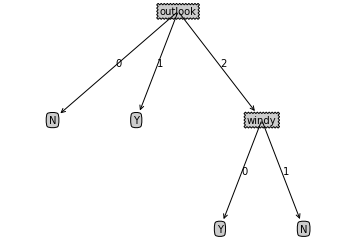

In [19]:
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', \
                            xytext=centerPt, textcoords='axes fraction', \
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = getTreeDepth(secondDict[key]) + 1
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalw, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalw
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalw = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalw
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

from math import log
import operator
#import treePlotter
import matplotlib.pyplot as plt
%matplotlib inline

#** 1. 定义数据：**
def createDataSet():
    dataSet = [[0, 0, 0, 0, 'N'], 
               [0, 0, 0, 1, 'N'], 
               [1, 0, 0, 0, 'Y'], 
               [2, 1, 0, 0, 'Y'], 
               [2, 2, 1, 0, 'Y'], 
               [2, 2, 1, 1, 'N'], 
               [1, 2, 1, 1, 'Y']]
    labels = ['outlook', 'temperature', 'humidity', 'windy']
    return dataSet, labels

#** 2. 计算熵：**
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1      # 数每一类各多少个， {'Y': 4, 'N': 3}
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

#** 3. 选择最大的gain ratio对应的feature：**
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1                 #feature个数
    baseEntropy = calcShannonEnt(dataSet)             #整个dataset的熵
    bestInfoGainRatio = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]  #每个feature的list
        uniqueVals = set(featList)                      #每个list的唯一值集合                 
        newEntropy = 0.0
        splitInfo = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)  #每个唯一值对应的剩余feature的组成子集
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
            splitInfo += -prob * log(prob, 2)
        infoGain = baseEntropy - newEntropy              #这个feature的infoGain
        if (splitInfo == 0): # fix the overflow bug
            continue
        infoGainRatio = infoGain / splitInfo             #这个feature的infoGainRatio      
        if (infoGainRatio > bestInfoGainRatio):          #选择最大的gain ratio
            bestInfoGainRatio = infoGainRatio
            bestFeature = i                              #选择最大的gain ratio对应的feature
    return bestFeature

#** 4. 划分数据，为下一层计算准备: **
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:                      #只看当第i列的值＝value时的item
            reduceFeatVec = featVec[:axis]              #featVec的第i列给除去
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)            
    return retDataSet

#** 5. 多重字典构建树：**
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]         # ['N', 'N', 'Y', 'Y', 'Y', 'N', 'Y']
    if classList.count(classList[0]) == len(classList):
        # classList所有元素都相等，即类别完全相同，停止划分
        return classList[0]                                  #splitDataSet(dataSet, 0, 0)此时全是N，返回N
    if len(dataSet[0]) == 1:                                 #[0, 0, 0, 0, 'N'] 
        # 遍历完所有特征时返回出现次数最多的
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)             #0－> 2   
        # 选择最大的gain ratio对应的feature
    bestFeatLabel = labels[bestFeat]                         #outlook -> windy     
    myTree = {bestFeatLabel:{}}                   
        #多重字典构建树{'outlook': {0: 'N'
    del(labels[bestFeat])                                    #['temperature', 'humidity', 'windy'] -> ['temperature', 'humidity']        
    featValues = [example[bestFeat] for example in dataSet]  #[0, 0, 1, 2, 2, 2, 1]     
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]                                #['temperature', 'humidity', 'windy']
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
            # 划分数据，为下一层计算准备
    return myTree

#** 6. 可视化决策树的结果: **
dataSet, labels = createDataSet()
labels_tmp = labels[:]
desicionTree = createTree(dataSet, labels_tmp)
#treePlotter.createPlot(desicionTree)
createPlot(desicionTree)
#链接：https://www.jianshu.com/p/479e92cf4c2c

## 2.3 CART(Classification and Regression Tree)
CART分类时，使用基尼指数（Gini）来选择最好的数据分割的特征，gini描述的是纯度，与信息熵的含义相似。CART中每一次迭代都会降低GINI系数。下图显示信息熵增益的一半，Gini指数，分类误差率三种评价指标非常接近。回归时使用均方差作为loss function。基尼系数的计算与信息熵增益的方式非常类似，公式如下
$$Gini(D)=1-\sum_{i=0}^{n}{{(\frac{D_i}{D}})^2} \ , \ Gini(D|A)=\sum_{i=0}^{n}{{\frac{D_i}{D}}{Gini(D_i)}}$$

CART生成算法（分类树） <br/>
基尼系数：在分类问题中，假设有K类，样本点属于第k类的概率为pk,则概率分布的基尼指数定义为： 
$$Gini( p) = \sum_{k=1}^Kp_k(1-p_k)=(p_1+p_2+...+p_K)-\sum_{k=1}^Kp_k^2=1-\sum_{k=1}^Kp_k^2$$
对于分类问题：设$C_k$ 为D中属于第k类的样本子集，则基尼指数为： 
$$Gini(D)=1-\sum_{k=1}^K(\frac{|C_k|}{|D|})^2$$
设条件A将样本D切分为 $D_1$ 和 $D_2$ 两个数据子集，则在条件A下的样本D的基尼指数为： 
$$Gini(D,A)=\frac{|D_1|}{D}Gini(D_1)+\frac{|D_2|}{D}Gini(D_2)$$
注意：基尼指数也表示样本的不确定性，基尼指数值越大，样本集合的不确定性越大。 <br/>
算法实现步骤： <br/>
1）计算现有样本D的基尼指数，之后利用样本中每一个特征A，及A的每一个可能取值a，根据A>=a与A&lt;a将样本分为两部分，并计算Gini(D,A)值 <br/>
2）找出对应基尼指数最小Gini(D,A)的最优切分特征及取值，并判断是否切分停止条件，否，则输出最优切分点 <br/>
3）递归调用1）2） <br/>
4）生成CART决策树

best_depth: 5
decision tree:
accuracy on the training subset:0.995
accuracy on the test subset:0.951
Feature importances:[0.         0.01991644 0.         0.         0.01378831 0.
 0.         0.         0.         0.         0.0099313  0.04713547
 0.         0.00243002 0.00235257 0.         0.         0.
 0.         0.         0.70786451 0.03236422 0.         0.00680904
 0.         0.         0.01771345 0.1281193  0.01157537 0.        ]


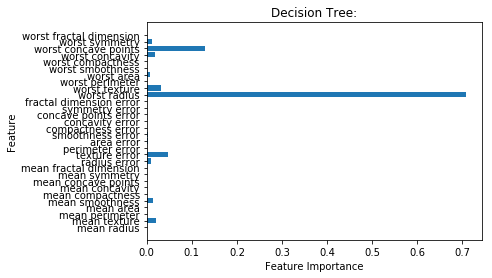

'\nprint(cancer.DESCR)\nprint(cancer.feature_names)\nprint(cancer.target_names)\nprint(cancer.data)\nprint(type(cancer.data))\nprint(cancer.data.shape)\n\n#可视化无法展示\ndot_data = export_graphviz(tree, out_file="cancertree.dot", class_names=[\'malignant\', \'benign\'], feature_names=cancer.feature_names, impurity=False, filled=True)\ngraph = pydotplus.graph_from_dot_data(dot_data) \nImage(graph.create_png())\n \n#![](cancertree.png)\n'

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 27 22:59:44 2018
 
@author: Toby，项目合作QQ：231469242
 radius半径
 texture结构，灰度值标准差
 symmetry对称
 
决策树找出强因子
worst radius
worst symmetry
worst texture
texture error 
"""
import csv, pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pydotplus
from IPython.display import Image
#import graphviz
from sklearn.tree import export_graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
 
cancer = load_breast_cancer()
 
featureNames = cancer.feature_names
#random_state 相当于随机数种子
X_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
 
list_average_accuracy = []
depth = range(1, 30)
for i in depth:
    #max_depth = 4限制决策树深度可以降低算法复杂度，获取更精确值
    tree = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree.fit(X_train, y_train)
    accuracy_training = tree.score(X_train, y_train)
    accuracy_test = tree.score(x_test, y_test)
    average_accuracy = (accuracy_training + accuracy_test) / 2.0
    #print("average_accuracy:", average_accuracy)
    list_average_accuracy.append(average_accuracy)
     
max_value = max(list_average_accuracy)
#索引是0开头，结果要加1
best_depth = list_average_accuracy.index(max_value) + 1
print("best_depth:", best_depth)
 
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
best_tree.fit(X_train, y_train)
accuracy_training = best_tree.score(X_train, y_train)
accuracy_test = best_tree.score(x_test, y_test)
 
print("decision tree:")   
print("accuracy on the training subset:{:.3f}".format(best_tree.score(X_train, y_train)))
print("accuracy on the test subset:{:.3f}".format(best_tree.score(x_test, y_test)))
print('Feature importances:{}'.format(best_tree.feature_importances_))
n_features = cancer.data.shape[1]
plt.barh(range(n_features), best_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.title("Decision Tree:")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

'''
print(cancer.DESCR)
print(cancer.feature_names)
print(cancer.target_names)
print(cancer.data)
print(type(cancer.data))
print(cancer.data.shape)

#可视化无法展示
dot_data = export_graphviz(tree, out_file="cancertree.dot", class_names=['malignant', 'benign'], feature_names=cancer.feature_names, impurity=False, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())
 
#![](cancertree.png)
'''

# 3 Random Forests
https://www.oschina.net/translate/random-forests-in-python?cmp


In [10]:
#随机森林
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import numpy as np 
 
from sklearn.datasets import load_iris 
iris = load_iris() 
#print iris#iris的４个属性是：萼片宽度　萼片长度　花瓣宽度　花瓣长度　标签是花的种类：setosa versicolour virginica 
print(iris['target'].shape)
rf = RandomForestRegressor() #这里使用了默认的参数设置 
rf.fit(iris.data[:150], iris.target[:150]) #进行模型的训练 
 
#随机挑选两个预测不相同的样本 
instance = iris.data[[100, 109]] 
print(instance)
rf.predict(instance[[0]])
print('instance 0 prediction；', rf.predict(instance[[0]]))
print('instance 1 prediction；', rf.predict(instance[[1]]))
print(iris.target[100], iris.target[109]) 

(150,)
[[6.3 3.3 6.  2.5]
 [7.2 3.6 6.1 2.5]]
instance 0 prediction； [2.]
instance 1 prediction； [2.]
2 2


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris 

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

train, test = df[df['is_train']==True], df[df['is_train']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]

pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])
#链接：https://www.jianshu.com/p/41bdf5ada130

preds,setosa,versicolor,virginica
actual,,,
setosa,14,0,0
versicolor,0,5,1
virginica,0,2,17


In [24]:
#3种方法的比较
#random forest test
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
X, y = make_blobs(n_samples=10000, n_features=10, centers=100, random_state=0)
 
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print(scores.mean())    
 
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print(scores.mean())    
 
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print(scores.mean())

0.9794087938205586
0.9996078431372549
0.99989898989899


In [26]:
#实现特征选择
#随机森林2
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import numpy as np 
from sklearn.datasets import load_iris 
iris = load_iris() 
 
from sklearn.model_selection import cross_val_score, ShuffleSplit 
X = iris["data"] 
Y = iris["target"] 
names = iris["feature_names"] 
rf = RandomForestRegressor() 
scores = [] 
for i in range(X.shape[1]): 
    score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2", cv=ShuffleSplit(len(X), 3, .3)) 
    scores.append((round(np.mean(score), 3), names[i])) 
print(sorted(scores, reverse=True))

[(0.855, 'petal length (cm)'), (0.836, 'petal width (cm)'), (-0.09, 'sepal length (cm)'), (-0.48, 'sepal width (cm)')]


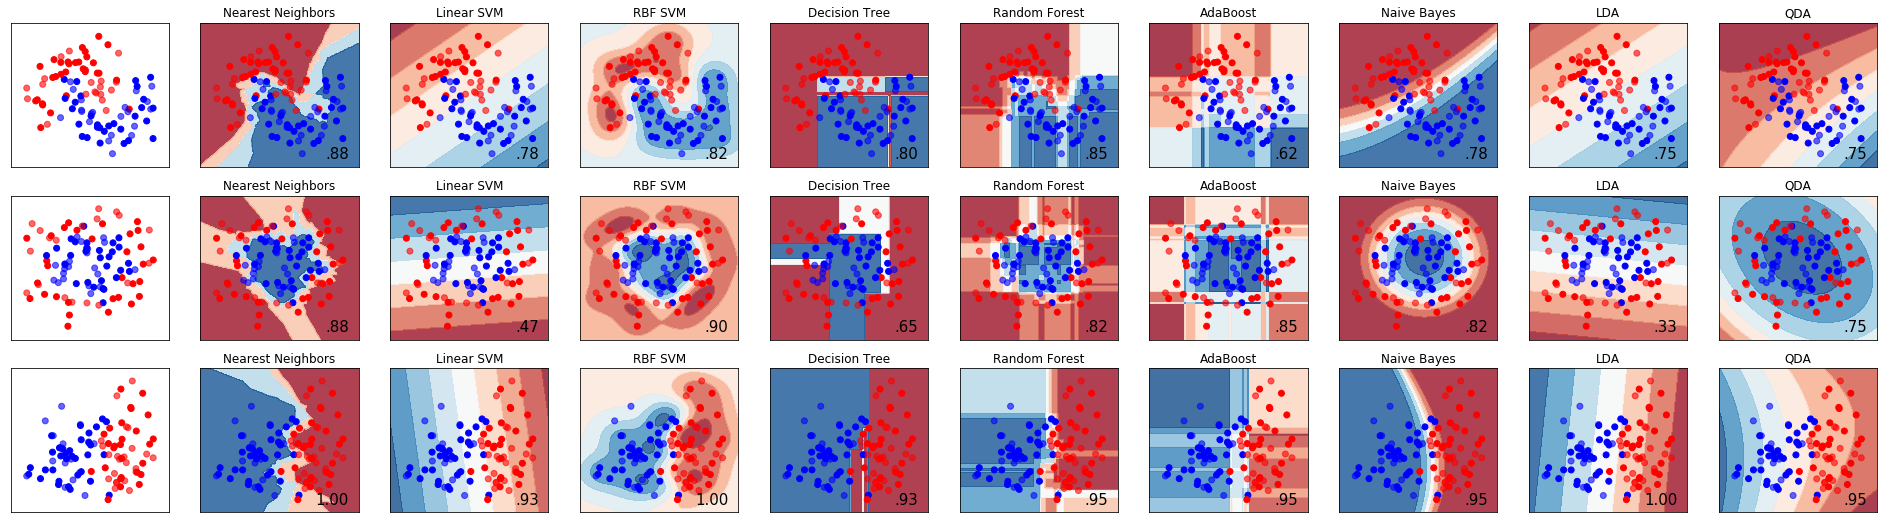

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "LDA", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

# 4 Regression
http://www.cnblogs.com/maybe2030/p/5375175.html

## 4.1 Linear Regression
广义线性模型（Generalized Linear Models）<br/>
一组回归的方法，其中目标值是被期望是输入变量的线性组合。用数学符号表示，如果 $\hat{y}$ 是预计的值。 
$$\hat{y}(w,x)=w_{0}+w_{1}*x_{1}+...+w_{p}*x_{p}$$
在整个模块中，我们设计向量 $w=(w_1,...,w_p)$ 作为coef_并且 $w_0$ 作为intercept_ <br>
用广义的线性模型来执行分类，见逻辑回归（Logistic regression）。

普通的最小二乘（Ordinary Least Squares）<br>
LinearRegression是用参数 $w=(w_1,...,w_p)$ 去拟合线性模型，并且最小化在数据中观察到的响应的残差平方和，并且通过线性近似来对响应进行预测。数学上它的形式是：$\min_{w}\lVert Xw-y \rVert_{2} ^2$  <br>
普通最小二乘法计算复杂度 <brb>
这种方法通过对X奇异值分解（singular value decomposition，SVD）来计算最小二乘的解，如果X是（n,p）的矩阵（n大于p），则代价为 $O(np^2)$ 

(442, 1)
(422, 2)
Mean Squared Error: 2548.072398725972


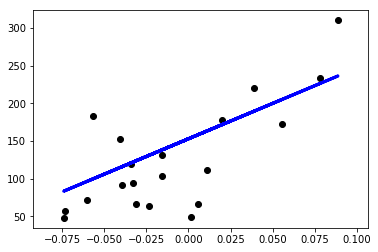

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

class LinearRegression():
    def __init__(self):#新建变量
        self.w = None

    def fit(self, X, y):#训练集的拟合
        X = np.insert(X, 0, 1, axis=1)#增加一个维度
        print (X.shape)        
        X_ = np.linalg.inv(X.T.dot(X))#公式求解
        self.w = X_.dot(X.T).dot(y)

    def predict(self, X):#测试集的测试反馈
        #h(theta)=theta.T.dot(X)
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        y_pred = X.dot(self.w)
        return y_pred

def mean_squared_error(y_true, y_pred):
#真实数据与预测数据之间的差值（平方平均）
    mse = np.mean(np.power(y_true - y_pred, 2))
    return mse

def main():
    #第一步：导入数据
    # Load the diabetes dataset
    diabetes = datasets.load_diabetes()

    # Use only one feature
    X = diabetes.data[:, np.newaxis, 2]
    print (X.shape)

    #第二步：将数据分为训练集以及测试集
    # Split the data into training/testing sets
    x_train, x_test = X[:-20], X[-20:]

    # Split the targets into training/testing sets
    y_train, y_test = diabetes.target[:-20], diabetes.target[-20:]

    #第三步：导入线性回归类（之前定义的）
    clf = LinearRegression()
    clf.fit(x_train, y_train)#训练
    y_pred = clf.predict(x_test)#测试

    #第四步：测试误差计算（需要引入一个函数）
    # Print the mean squared error
    print ("Mean Squared Error:", mean_squared_error(y_test, y_pred))

    #matplotlib可视化输出
    # Plot the results
    plt.scatter(x_test[:,0], y_test,  color='black')#散点输出
    plt.plot(x_test[:,0], y_pred, color='blue', linewidth=3)#预测输出
    plt.show()
    
main()

(0, 12)

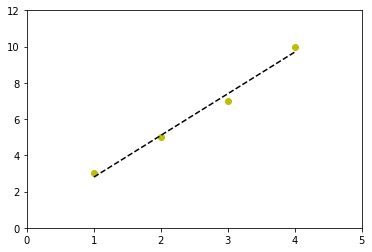

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [3, 5, 7, 10] # 10, not 9, so the fit isn't perfect

fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x, y, 'yo', x, fit_fn(x), '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)

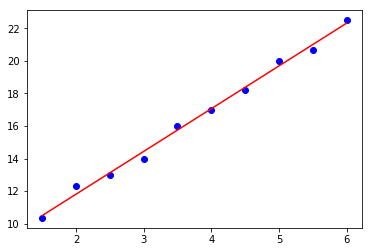

In [33]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

x = np.array([1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
y = np.array([10.35, 12.3, 13, 14.0, 16, 17, 18.2, 20, 20.7, 22.5])
gradient, intercept, r_value, p_value, std_err = stats.linregress(x, y)
mn = np.min(x)
mx = np.max(x)
x1 = np.linspace(mn, mx, 500)
y1 = gradient * x1 + intercept
plt.plot(x, y, 'ob')
plt.plot(x1, y1, '-r')
plt.show()

## 4.2 Non-LinearRegression

[-0.15882231  1.00658713]
rmse=0.13, R2=0.84, R22=0.60, clf.score=0.84
[ 0.016092   -0.04711354  1.05581229]
rmse=0.10, R2=0.90, R22=0.69, clf.score=0.90
[ 1.03892312e-01 -3.00458157e+01  2.17120293e+03 -6.36727366e+04
  7.75440368e+05  1.05174798e+06 -1.60170423e+08  2.39778051e+09
 -2.00190825e+10  1.09654206e+11 -4.12401865e+11  1.06283501e+12
 -1.77882512e+12  1.58853231e+12  3.76624315e+10 -1.39277966e+12
  3.49489251e+11  1.15385914e+12  3.63217263e+10 -1.14306280e+12
 -5.78943513e+11  6.94315820e+11  1.03903824e+12  1.90915096e+11
 -6.75286251e+11 -9.41014030e+11 -4.15452500e+11  5.42427771e+11
  9.22353657e+11  6.24170907e+11 -2.96794018e+10 -5.46461607e+11
 -8.84263394e+11 -5.53472934e+11 -7.61940613e+10  4.70244705e+11
  8.17612143e+11  6.73631314e+11  3.41643375e+11 -1.54080947e+11
 -6.44401761e+11 -7.21633135e+11 -6.45903786e+11 -2.93725526e+11
  9.65099470e+10  5.21663496e+11  6.94553248e+11  7.03466510e+11
  4.31021734e+11  1.17556165e+11 -2.48722201e+11 -5.18208673e+11
 

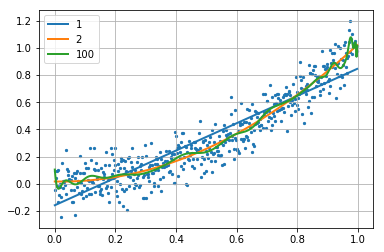

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.stats import norm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

''' 数据生成 '''
x = np.arange(0, 1, 0.002)
y = norm.rvs(0, size=500, scale=0.1)
y = y + x**2

''' 均方误差根 '''
def rmse(y_test, y):
    return sp.sqrt(sp.mean((y_test - y) ** 2))

''' 与均值相比的优秀程度，介于[0~1]。0表示不如均值。1表示完美预测.这个版本的实现是参考scikit-learn官网文档  '''
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()

''' 这是Conway&White《机器学习使用案例解析》里的版本 '''
def R22(y_test, y_true):
    y_mean = np.array(y_true)
    y_mean[:] = y_mean.mean()
    return 1 - rmse(y_test, y_true) / rmse(y_mean, y_true)

plt.scatter(x, y, s=5)
degree = [1, 2, 100]
y_test = []
y_test = np.array(y_test)

for d in degree:
    clf = Pipeline([('poly', PolynomialFeatures(degree=d)),
                    ('linear', LinearRegression(fit_intercept=False))])
    clf.fit(x[:, np.newaxis], y)
    y_test = clf.predict(x[:, np.newaxis])

    print(clf.named_steps['linear'].coef_)
    print('rmse=%.2f, R2=%.2f, R22=%.2f, clf.score=%.2f' % (rmse(y_test, y), 
          R2(y_test, y), R22(y_test, y), clf.score(x[:, np.newaxis], y)))

    plt.plot(x, y_test, linewidth=2)

plt.grid()
plt.legend(['1','2','100'], loc='upper left')
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


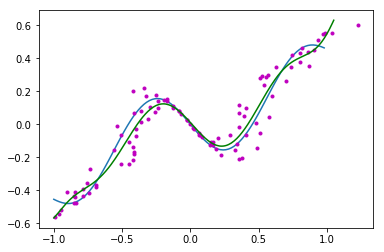

In [51]:
# coding = utf-8
 
'''
作者:Xiaole Wen
程序:多项式曲线拟合算法
'''
import matplotlib.pyplot as plt
import math
import numpy
import random
 
fig = plt.figure()
ax = fig.add_subplot(111)
 
#在这里给出拟合多项式的阶数
order = 9
 
#生成曲线上的各个点
x = numpy.arange(-1, 1, 0.02)
y = [((a*a-1) * (a*a-1) * (a*a-1) + 0.5) * numpy.sin(a*2) for a in x]
#ax.plot(x, y, color = 'r', linestyle = '-', marker = '')
#, label = "(a*a-1)*(a*a-1)*(a*a-1)+0.5"
plt.plot(x, y)                                                                                                                                     #生成的曲线上的各个点偏移一下，并放入到xa, ya中去
i = 0
xa = []
ya = []
for xx in x:
    yy = y[i]
    d = float(random.randint(60, 140)) / 100
    #ax.plot([xx*d], [yy*d], color = 'm', linestyle = '', marker = '.')
    i += 1
    xa.append(xx * d)
    ya.append(yy * d)

ax.plot(xa, ya, color = 'm', linestyle = '', marker = '.')
#存储从0次到m次的所有冥方和
bigMat = []
for j in range(0, 2 * order + 1):
    sum = 0
    for i in range(0, len(xa)):
        sum += (xa[i] ** j)
    bigMat.append(sum)

#计算线性方程组系数矩阵
matA = []
for rowNum in range(0, order + 1):
    row = bigMat[rowNum:rowNum + order + 1]
    matA.append(row)

matA = numpy.array(matA)
 
matB = []
for i in range(0, order + 1):
    ty = 0.0
    for k in range(0, len(xa)):
        ty += ya[k] * (xa[k]**i)
    matB.append(ty)

matB = numpy.array(matB)

matAA = numpy.linalg.solve(matA, matB)
 
#画出拟合后的曲线
#print(matAA)
xxa =  numpy.arange(-1, 1.06, 0.01)
yya = []
for i in range(0, len(xxa)):
    yy = 0.0
    for j in range(0, order + 1):
        dy = (xxa[i]**j)
        dy *= matAA[j]
        yy += dy
    yya.append(yy)
ax.plot(xxa, yya, color = 'g', linestyle = '-', marker = '')
 
ax.legend()
plt.show()

## 4.3 岭回归（Ridge Regression）
岭回归是一种专门用于共线性数据分析的有偏估计回归方法，实质上时改良的最小二乘估计法，通过放弃最小二乘法的无偏性（在反复抽样的情况下，样本均值的集合的期望等于总体均值），以损失部分信息、降低精度为代价获得回归系数更为符合实际、更可靠的回归方法，对共线性问题和病态数据的拟合要强于最小二乘法经，常用于多维问题与不适定问题（ill-posed problem）。 <br>
岭回归通过引入一个惩罚变量解决了普通最小二乘法的问题。岭回归相关系数是的惩罚残差平方和最小： 
$$\large{\min_w ||X_w - y||_2^2 + \alpha ||w||_2^2=\sum_{i=1}^{n}{(y_i-\sum_{j=0}^{p}{w_j x_{ij}})^2} + \lambda \sum_{j=0}^{p}{w_j^2}}$$
$\alpha \geq 0$ 是收缩率，既控制模型复杂度的因子。

In [52]:
# 岭回归（Ridge 回归）
from sklearn import linear_model
X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]
clf = linear_model.Ridge(alpha=0.1)  # 设置k值
clf.fit(X, y)  # 参数拟合
print(clf.coef_)  # 系数
print(clf.intercept_)  # 常量
print(clf.predict([[3, 3]]))  # 求预测值
print(clf.decision_function(X))  # 求预测，等同predict
print(clf.score(X, y))  # R^2，拟合优度
print(clf.get_params())  # 获取参数信息
print(clf.set_params(fit_intercept=False))  # 重新设置参数

[0.48780488 0.48780488]
0.024390243902439046
[2.95121951]
[0.02439024 1.         1.97560976]
0.9994051160023796
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19.
  warnings.warn(msg, category=DeprecationWarning)


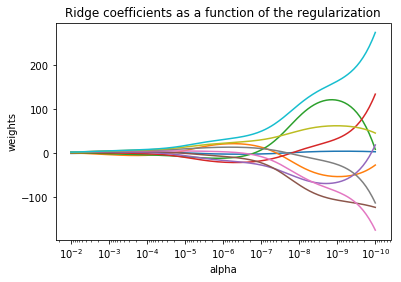

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#创建一个希伯特矩阵(高度病态，任何一个元素的点发生变动，整个矩阵的行列式的值和逆矩阵都会发生巨大变化)
#这里的加法运算类似于矩阵相乘
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

#计算路径
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
#图形展示
#设置刻度
ax = plt.gca() 
#设置刻度的映射 
ax.plot(alphas, coefs)
#设置x轴的刻度显示方式
ax.set_xscale('log')
#翻转x轴
ax.set_xlim(ax.get_xlim()[::-1])
#设置x、y标签以及标题
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
#使得坐标轴最大值和最小值与数据保持一致
plt.axis('tight')
plt.show()

## 4.4 Logistic
首先给出线性回归模型： $f(x)=w_0 x_0 + w_1 x_1 + ... + w_n x_n + b$ <br>
写成向量形式为： $f(x)=w^T x + b$ <br>
同时“广义线性回归”模型为： $y=g^{-1} (w^T x + b)$ <br>
极大似然估计...

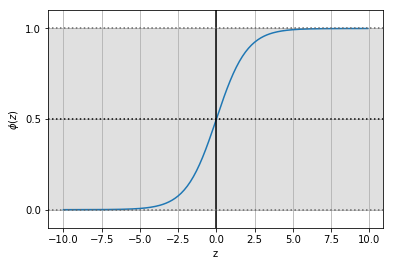

In [57]:
#! /usr/bin/python <br> # -*-coding: utf8 -*-
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

z = np.arange(-10,10,0.1)
p = sigmoid(z)
plt.plot(z,p)
#画一条竖直线，如果不设定x的值，则默认是0
plt.axvline(x=0, color='k')
plt.axhspan(0.0, 1.0, facecolor='0.7', alpha=0.4)
# 画一条水平线，如果不设定y的值，则默认是0
plt.axhline(y=1, ls='dotted', color='0.4')
plt.axhline(y=0, ls='dotted', color='0.4')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.ylim(-0.1,1.1)
#确定y轴的坐标
plt.yticks([0.0, 0.5, 1.0])
plt.ylabel('$\phi (z)$')
plt.xlabel('z')
ax = plt.gca()
ax.grid(True)
plt.show()
#链接：https://www.jianshu.com/p/9db03938ea72

[0 1 2]


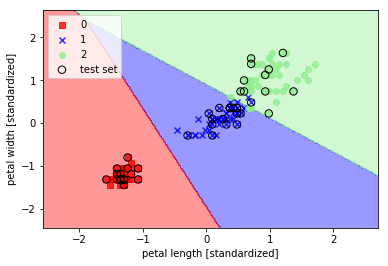

[0.70793846 1.50872803]
[[2.05743774e-11 6.31620264e-02 9.36837974e-01]]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [67]:
#!pip install mlxtend
#! usr/bin/python <br> # -*- coding:utf8 -*-
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_regions(X, y, classifier,test_idx = None, resolution=0.02):
    #setup marker generator and colormap
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    # X[:,k] 冒号左边表示行范围，读取所有行，冒号右边表示列范围，读取第K列
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution),
                           np.arange(x2_min,x2_max, resolution))
    #arange(start,end,step) 返回一个一维数组
    #meshgrid(x,y)产生一个以x为行，y为列的矩阵
    #xx1是一个(305*235)大小的矩阵 xx1.ravel()是将所有的行放在一个行里面的长度71675的一维数组
    #xx2同理
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #np.array([xx1.ravel(), xx2.ravel()]) 生成了一个 (2*71675)的矩阵
    # xx1.ravel() = (1,71675)
    #xx1.shape = (305,205) 将Z重新调整为(305,205)的格式
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    print(np.unique(y))
    # idx = 0,1 cl = -1 1
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker = markers[idx],label = cl)
    #highlight test samples   
    #增加的模块
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolors='0',
                    alpha=1.0, linewidths=1, marker='o',
                    s=55, label='test set')


__author__ = 'Administrator'
#! /usr/bin/python <br> # -*- coding: utf8 -*-
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#from PDC import plot_decision_regions
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
Ir = LogisticRegression(C=1000.0, random_state=0)
Ir.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=Ir, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.savefig('Iris.png')
plt.show()

print(X_test_std[0, :])
a = Ir.predict_proba(X_test_std[0, :])
print(a)
#链接：https://www.jianshu.com/p/9db03938ea72

## 4.5 主成分回归

## 4.6 Least Squares Regreesion

# 5 Bayes Network

## 5.1 朴素贝叶斯
朴素贝叶斯是使用概率论来分类的算法。其中朴素：各特征条件独立；贝叶斯：根据贝叶斯定理。<br>
根据贝叶斯定理，对一个分类问题，给定样本特征x，样本属于类别y的概率是：
$$p(y|x)=\frac{p(x|y)p(y)}{p(x)}$$ 
在这里，x 是一个特征向量，设 x 维度为 M。因为朴素的假设，即特征条件独立，根据全概率公式展开，上式可以表达为：
$$\large{p(y=c_k|x)=\frac{\prod_{i=1}^{M}{p(x^i|y=c_k)p(y=c_k)}}{\sum_{k}^{}{p(y=c_k)\prod_{i=1}^{M}{p(x^i\mid y=c_k)}}}}$$
这里，只要分别估计出，特征 $Χ^i$ 在每一类的条件概率就可以了。类别 y 的先验概率可以通过训练集算出，同样通过训练集上的统计，可以得出对应每一类上的，条件独立的特征对应的条件概率向量。 

In [72]:
from sklearn import datasets ##导入包中的数据
iris = datasets.load_iris() ##加载数据

iris.feature_names  ##显示特征名字
iris.data   ##显示数据
iris.data.size  ##数据大小 ---600个
iris.target_names  ##显示分类的名字 

from sklearn.naive_bayes import GaussianNB ##导入高斯朴素贝叶斯算法
clf = GaussianNB()    ##给算法赋一个变量，主要是为了方便使用
clf.fit(iris.data, iris.target)  ##开始分类。对于量特别大的样本，可以使用函数partial_fit分类，避免一次加载过多数据到内存
 
clf.predict(iris.data[0].reshape(1, -1)) ##验证分类。标红部分特别说明：因为predict的参数是数组，data[0]是列表，所以需要转换一下

data = np.array([6, 4, 6, 2])   ##验证分类
clf.predict(data.reshape(1, -1))

array([2])

In [73]:
#多项式分布朴素贝叶斯：常用于文本分类，特征是单词，值是单词出现的次数。
##示例来在官方文档，详细说明见第一个例子
import numpy as np
X = np.random.randint(5, size=(6, 100)) ##返回随机整数值：范围[0,5) 大小6*100 6行100列
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 
print(clf.predict(X[2]))

[3]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [74]:
#伯努力朴素贝叶斯：每个特征都是是布尔型，得出的结果是0或1，即出现没出现
##示例来在官方文档，详细说明见第一个例子
import numpy as np
X = np.random.randint(2, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) 
print(clf.predict(X[2]))

[3]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## 5.2 贝叶斯信念网络

# 6 SVM
SVM是作为分类器在logistic regression的基础上引出的。其学习方法是把数据映射到一个高维空间上，使数据变稀疏，比较容易找到一个分割面来将数据分类，而这个高维的分割面就是超平面。而SVM做的就是找到这样一个超平面使得数据点离这个超平面尽可能的远，这样的分类效果才会好。

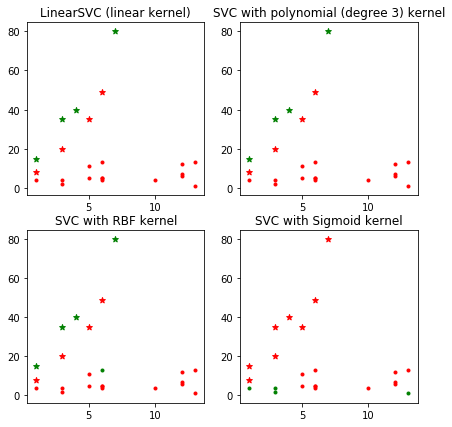

In [76]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

##设置子图数量
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
ax0, ax1, ax2, ax3 = axes.flatten()

#准备训练样本
x = [[1,8], [3,20], [1,15], [3,35], [5,35], [4,40], [7,80], [6,49]]
y = [1, 1, -1, -1, 1, -1, -1, 1]
'''
    说明1：
       核函数(这里简单介绍了sklearn中svm的四个核函数，还有precomputed及自定义的)
        
    LinearSVC：主要用于线性可分的情形。参数少，速度快，对于一般数据，分类效果已经很理想
    RBF:主要用于线性不可分的情形。参数多，分类结果非常依赖于参数
    polynomial:多项式函数,degree 表示多项式的程度-----支持非线性分类
    Sigmoid：在生物学中常见的S型的函数，也称为S型生长曲线

    说明2：根据设置的参数不同，得出的分类结果及显示结果也会不同
    
'''
##设置子图的标题
titles = ['LinearSVC (linear kernel)',  
          'SVC with polynomial (degree 3) kernel',  
          'SVC with RBF kernel',      ##这个是默认的
          'SVC with Sigmoid kernel']
##生成随机试验数据(15行2列)
rdm_arr = np.random.randint(1, 15, size=(15,2))

def drawPoint(ax, clf, tn):
    ##绘制样本点
    for i in x:
        ax.set_title(titles[tn])
        res = clf.predict(np.array(i).reshape(1, -1))
        if res > 0:
           ax.scatter(i[0], i[1], c='r', marker='*')
        else :
           ax.scatter(i[0], i[1], c='g', marker='*')
     ##绘制实验点
    for i in rdm_arr:
        res = clf.predict(np.array(i).reshape(1, -1))
        if res > 0:
           ax.scatter(i[0], i[1], c='r', marker='.')
        else :
           ax.scatter(i[0], i[1], c='g', marker='.')

if __name__=="__main__":
    ##选择核函数
    for n in range(0,4):
        if n==0:
            clf = svm.SVC(kernel='linear').fit(x, y)
            drawPoint(ax0, clf, 0)
        elif n==1:
            clf = svm.SVC(kernel='poly', degree=3).fit(x, y)
            drawPoint(ax1, clf, 1)
        elif n==2:
            clf= svm.SVC(kernel='rbf').fit(x, y)
            drawPoint(ax2, clf, 2)
        else :
            clf= svm.SVC(kernel='sigmoid').fit(x, y)
            drawPoint(ax3, clf, 3)
    plt.show()

# 7 Nuaral network

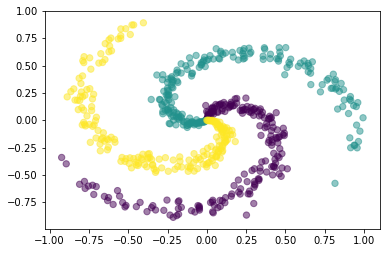

iteration 0: loss 1.098608
training accuracy: 0.52


In [80]:
import numpy as np
import matplotlib.pyplot as plt

N = 200 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K, D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N) # radius
  t = np.linspace(j*4, (j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# print y

# lets visualize the data:
plt.scatter(X[:,0], X[:,1], s=40, c=y, alpha=0.5)
plt.show()

# Train a Linear Classifier

# initialize parameters randomly

h = 20 # size of hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

# define some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(1):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  # print np.size(hidden_layer,1)
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples), y])
  data_loss = np.sum(corect_logprobs) / num_examples
  reg_loss = 0.5 * reg * np.sum(W*W) + 0.5 * reg * np.sum(W2*W2)
  loss = data_loss + reg_loss

  if i % 1000 == 0:
    print("iteration %d: loss %f" % (i, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0

  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

  # evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)

print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

## 7.1 BP

In [81]:
import math
import random
import string

random.seed(0)

# 生成区间[a, b)内的随机数
def rand(a, b):
    return (b-a) * random.random() + a

# 生成大小 I*J 的矩阵，默认零矩阵 (当然，亦可用 NumPy 提速)
def makeMatrix(I, J, fill=0.0):
    m = []
    for i in range(I):
        m.append([fill] * J)
    return m

# 函数 sigmoid，这里采用 tanh，因为看起来要比标准的 1/(1+e^-x) 漂亮些
def sigmoid(x):
    return math.tanh(x)

# 函数 sigmoid 的派生函数, 为了得到输出 (即：y)
def dsigmoid(y):
    return 1.0 - y**2

class NN:
    ''' 三层反向传播神经网络 '''
    def __init__(self, ni, nh, no):
        # 输入层、隐藏层、输出层的节点（数）
        self.ni = ni + 1 # 增加一个偏差节点
        self.nh = nh
        self.no = no

        # 激活神经网络的所有节点（向量）
        self.ai = [1.0] * self.ni
        self.ah = [1.0] * self.nh
        self.ao = [1.0] * self.no
        
        # 建立权重（矩阵）
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        # 设为随机值
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # 最后建立动量因子（矩阵）
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)

    def update(self, inputs):
        if len(inputs) != self.ni - 1:
            raise ValueError('与输入层节点数不符！')

        # 激活输入层
        for i in range(self.ni - 1):
            #self.ai[i] = sigmoid(inputs[i])
            self.ai[i] = inputs[i]

        # 激活隐藏层
        for j in range(self.nh):
            sum = 0.0
            for i in range(self.ni):
                sum = sum + self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum)

        # 激活输出层
        for k in range(self.no):
            sum = 0.0
            for j in range(self.nh):
                sum = sum + self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum)

        return self.ao[:]

    def backPropagate(self, targets, N, M):
        ''' 反向传播 '''
        if len(targets) != self.no:
            raise ValueError('与输出层节点数不符！')

        # 计算输出层的误差
        output_deltas = [0.0] * self.no
        for k in range(self.no):
            error = targets[k]-self.ao[k]
            output_deltas[k] = dsigmoid(self.ao[k]) * error

        # 计算隐藏层的误差
        hidden_deltas = [0.0] * self.nh
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error = error + output_deltas[k] * self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error

        # 更新输出层权重
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k] * self.ah[j]
                self.wo[j][k] = self.wo[j][k] + N * change + M * self.co[j][k]
                self.co[j][k] = change
                #print(N*change, M*self.co[j][k])

        # 更新输入层权重
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j] * self.ai[i]
                self.wi[i][j] = self.wi[i][j] + N * change + M * self.ci[i][j]
                self.ci[i][j] = change

        # 计算误差
        error = 0.0
        for k in range(len(targets)):
            error = error + 0.5 * (targets[k]-self.ao[k])**2
        return error

    def test(self, patterns):
        for p in patterns:
            print(p[0], '->', self.update(p[0]))

    def weights(self):
        print('输入层权重:')
        for i in range(self.ni):
            print(self.wi[i])
        print()
        print('输出层权重:')
        for j in range(self.nh):
            print(self.wo[j])

    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        # N: 学习速率(learning rate)
        # M: 动量因子(momentum factor)
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.update(inputs)
                error = error + self.backPropagate(targets, N, M)
            if i % 100 == 0:
                print('误差 %-.5f' % error)


def demo():
    # 一个演示：教神经网络学习逻辑异或（XOR）------------可以换成你自己的数据试试
    pat = [
        [[0,0], [0]],
        [[0,1], [1]],
        [[1,0], [1]],
        [[1,1], [0]]
    ]

    # 创建一个神经网络：输入层有两个节点、隐藏层有两个节点、输出层有一个节点
    n = NN(2, 2, 1)
    # 用一些模式训练它
    n.train(pat)
    # 测试训练的成果（不要吃惊哦）
    n.test(pat)
    # 看看训练好的权重（当然可以考虑把训练好的权重持久化）
    #n.weights()
    
    
if __name__ == '__main__':
    demo()

误差 0.94250
误差 0.04287
误差 0.00348
误差 0.00164
误差 0.00106
误差 0.00078
误差 0.00092
误差 0.00053
误差 0.00044
误差 0.00038
[0, 0] -> [0.03036939032113823]
[0, 1] -> [0.9817636240847771]
[1, 0] -> [0.9816259907635363]
[1, 1] -> [-0.025585374843295334]


0.95


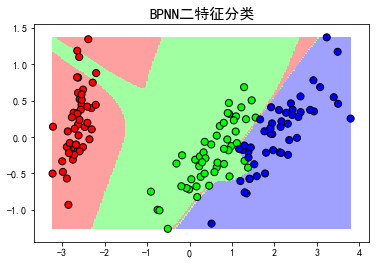

(200, 200)


In [92]:
import math
import random
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import accuracy_score 
 
def trtype(s):#定义类别转换函数
    types = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return types[s]

from sklearn.datasets import load_iris 
data = load_iris() 
#data = np.loadtxt('iris.data', delimiter = ', ', converters = {4:trtype})#读入数据，第五列转换为类别012
 
#x, y = np.split(data, (4, ), axis = 1) #切分data和label
x = iris["data"] 
y = iris["target"] 
names = iris["feature_names"] 

pca = PCA(n_components = 2)
x = pca.fit_transform(x)#为方便绘图，对x进行PCA降维至二维 
#划分测试集和训练集
def label_tr(y):#标签转换，将一维标签转换为三维
    l = {0:[1, 0, 0], 1:[0, 1, 0], 2:[0, 0, 1]}
    ys = []
    for i in range(len(y)):
        ys.append(l[int(y[i])])
    return np.array(ys)
def inv_label_tr(y_1d):#标签转换逆过程
   
    y_pres = []
    for i in range(y_1d.shape[0]):
        for j in range(3):
            if (y_1d[i][j] == 1):
                y_lable = j
        y_pres.append(y_lable)
        
    return np.array(y_pres)
 
y = label_tr(y)
#划分数据
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, train_size = 0.6)

random.seed(0)

def rand(a, b):#随机数函数
    return (b - a) * random.random() + a

def make_matrix(m, n, fill = 0.0):#矩阵生成函数
    mat = []
    for i in range(m):
        mat.append([fill] * n)
    return mat

def sigmoid(x):#激活函数
    return 1.0 / (1.0 + math.exp(-x))

def sigmoid_derivative(x):#激活函数求导
    return x * (1 - x)

class BPNeuralNetwork:#BP神经网络类
    def __init__(self):#初始化
        self.input_n = 0
        self.hidden_n = 0
        self.output_n = 0
        self.input_cells = []
        self.hidden_cells = []
        self.output_cells = []
        self.input_weights = []
        self.output_weights = []
        self.input_correction = []
        self.output_correction = []

    def setup(self, ni, nh, no):
        #初始化输入、隐层、输出元数
        self.input_n = ni + 1
        self.hidden_n = nh
        self.output_n = no
        # 初始化神经元
        self.input_cells = [1.0] * self.input_n
        self.hidden_cells = [1.0] * self.hidden_n
        self.output_cells = [1.0] * self.output_n
        # 初始化权重矩阵
        self.input_weights = make_matrix(self.input_n, self.hidden_n)
        self.output_weights = make_matrix(self.hidden_n, self.output_n)
        # 初始化权重
        for i in range(self.input_n):
            for h in range(self.hidden_n):
                self.input_weights[i][h] = rand(-0.2, 0.2)
        for h in range(self.hidden_n):
            for o in range(self.output_n):
                self.output_weights[h][o] = rand(-2.0, 2.0)
        # 初始化偏置
        self.input_correction = make_matrix(self.input_n, self.hidden_n)
        self.output_correction = make_matrix(self.hidden_n, self.output_n)

    def predict(self, inputs):
        # 激活输入层
        for i in range(self.input_n - 1):
            self.input_cells[i] = inputs[i]
        # 激活隐层
        for j in range(self.hidden_n):
            total = 0.0
            for i in range(self.input_n):
                total +=  self.input_cells[i] * self.input_weights[i][j]
            self.hidden_cells[j] = sigmoid(total)
        # 激活输出层
        for k in range(self.output_n):
            total = 0.0
            for j in range(self.hidden_n):
                total +=  self.hidden_cells[j] * self.output_weights[j][k]
            self.output_cells[k] = sigmoid(total)
        return self.output_cells[:]

    def back_propagate(self, case, label, learn, correct):
        # 反向传播
        self.predict(case)
        # 求输出误差
        output_deltas = [0.0] * self.output_n
        for o in range(self.output_n):
            error = label[o] - self.output_cells[o]
            output_deltas[o] = sigmoid_derivative(self.output_cells[o]) * error
        # 求隐层误差
        hidden_deltas = [0.0] * self.hidden_n
        for h in range(self.hidden_n):
            error = 0.0
            for o in range(self.output_n):
                error +=  output_deltas[o] * self.output_weights[h][o]
            hidden_deltas[h] = sigmoid_derivative(self.hidden_cells[h]) * error
        # 更新输出权重
        for h in range(self.hidden_n):
            for o in range(self.output_n):
                change = output_deltas[o] * self.hidden_cells[h]
                self.output_weights[h][o] +=  learn * change + correct * self.output_correction[h][o]
                self.output_correction[h][o] = change
        # 更新输入权重
        for i in range(self.input_n):
            for h in range(self.hidden_n):
                change = hidden_deltas[h] * self.input_cells[i]
                self.input_weights[i][h] +=  learn * change + correct * self.input_correction[i][h]
                self.input_correction[i][h] = change
        # 求全局误差
        error = 0.0
        for o in range(len(label)):
            error +=  0.5 * (label[o] - self.output_cells[o]) ** 2
        return error

    def train(self, cases, labels, limit = 10000, learn = 0.05, correct = 0.1):
        #训练神经网络
        for j in range(limit):
            error = 0.0
            for i in range(len(cases)):
                label = labels[i]
                case = cases[i]
                error +=  self.back_propagate(case, label, learn, correct)
   
    def fit(self, x_test):#离散预测函数用于输出数据
        y_pre_1d = []
        for case in x_test:
            y_pred = self.predict(case)
            for i in range(len(y_pred)):
                if (y_pred[i] == max(y_pred)):
                    y_pred[i] = 1
                else: y_pred[i] = 0
            y_pre_1d.append(y_pred)
        return inv_label_tr(np.array(y_pre_1d))

    def fit2(self, x_test):#连续预测函数用于画图
        y_pre_1d = []
        for case in x_test:
            w = np.array([0, 1, 2])
            y_pred = self.predict(case)
            y_pre_1d.append(np.array(y_pred).dot(w.T))
        return np.array(y_pre_1d)

if __name__ == '__main__':#主函数
    nn = BPNeuralNetwork()
    nn.setup(2, 5, 3)#初始化
    nn.train(x_train, y_train, 100000, 0.05, 0.1)#训练
    y_pre_1d = nn.fit(x_test)#测试
    y_test_1d = inv_label_tr(y_test)
    print(accuracy_score(y_pre_1d, y_test_1d)) #打印测试精度
   
    #画图
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    cm_light = mpl.colors.ListedColormap(['#FFA0A0', '#A0FFA0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA'])

    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j] # 生成网格采样点

    grid_test = np.stack((x1.flat, x2.flat), axis = 1)  # 测试点
    grid_hat = nn.fit2(grid_test)#预测结果
    grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.pcolormesh(x1, x2, grid_hat, cmap = cm_light)
    plt.scatter(x[:, 0], x[:, 1], c = y, edgecolors = 'k', s = 50, cmap = cm_dark)
    plt.title(u'BPNN二特征分类', fontsize = 15)
    plt.show()
    print(grid_hat.shape)

## 7.2 LM

In [24]:
###构建神经网络分类模型
from keras.models import Sequential #导入神经网络初始化函数
from keras.layers.core import Dense, Activation #导入神经网络层函数、激活函数
'''
from sklearn.datasets import load_iris 
iris = load_iris()
#df = pd.DataFrame(iris.data, columns=iris.feature_names)
#df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
#df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
#data_train, data_test = df[df['is_train']==True], df[df['is_train']==False]
from sklearn.cross_validation import train_test_split
x = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
'''
net = Sequential() #建立神经网络
net.add(Dense(input_dim = 3, output_dim = 10)) #添加输入层（3节点）到隐藏层（10节点）的连接
net.add(Activation('relu')) #隐藏层使用relu激活函数
net.add(Dense(input_dim = 10, output_dim = 1)) #添加隐藏层（10节点）到输出层（1节点）的连接
net.add(Activation('sigmoid')) #输出层使用sigmoid激活函数
net.compile(loss = 'binary_crossentropy', optimizer = 'adam') #编译模型，使用adam方法求解

net.fit(data_train[:,:3], data_train[:,3], nb_epoch=1000, batch_size=1) #训练模型，循环1000次
net.save_weights('./LM_net.model') #保存模型

predict_result = net.predict_classes(data_train[:,:3]).reshape(len(data_train)) #预测结果变形

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=3, units=10)`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, units=1)`


TypeError: unhashable type: 'slice'

In [21]:
from sklearn.metrics import roc_curve #导入ROC曲线函数
import matplotlib.pyplot as plt
fpr1, tpr1, thresholds1 = roc_curve(data_test[:,3], net.predict(data_test[:,:3]).reshape(len(data_test)), pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(data_test[:,3], tree.predict_proba(data_test[:,:3])[:,1], pos_label=1)
plt.plot(fpr1, tpr1, linewidth=2, label = 'ROC of LM', color = 'blue') #作出ROC曲线
plt.plot(fpr2, tpr2, linewidth=2, label = 'ROC of CART', color = 'green') 
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc=4) #图例
plt.show() #显示作图结果

NameError: name 'data_test' is not defined

## 7.3 RBF

## 7.4 FNN

## 7.5 GMDH

## 7.6 ANFIS